**Task:** The given dataset contains details about organic chemical compounds
including their chemical features, isomeric conformation, names and the classes
in which they are classified. The compounds are classified as either ‘Musk’ or
‘Non-Musk’ compounds. Your task is to build a classification model on the
given data using any Deep Learning approach that you deem appropriate viz.
Multi-Layer Perceptron, CNN, RNN, etc. or you could also use transfer
learning approaches through selection of appropriate pre-trained model. The
data has to be split in a 80:20 ratio for training and validation datasets. You can
perform whatever preprocessing and post-processing operations on the data that
may help you improve the performance of your model. You are required to
report the performance measures of the model viz. Accuracy( Training and
Validation) and Loss(Training and Validation) graphs, F1 score, precision,
recall, etc. along with a well detailed report of what models, pre-processing,
post-processing approaches you have used and why you chose to use these
approaches.

**import all the usefull library**

In [0]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv("/content/drive/My Drive/deep learning/Copy of musk_csv.csv")#read the data file 

In [91]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


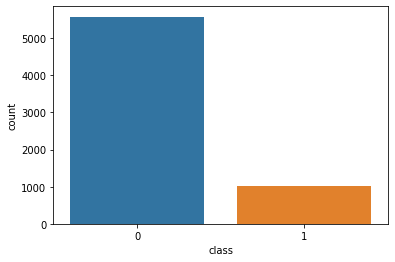

In [164]:
sns.countplot(x='class', data=data)
plt.show()

**here we can see this is imbalance data set **

<h1>data preprocesing </h2>


**molecule_name**

In [93]:
print(data['molecule_name'].values[0])
print("="*50)
print(data['molecule_name'].values[2])
print("="*50)
print(data['molecule_name'].values[5000])
print("="*50)
print(data['molecule_name'].values[6000])
print("="*50)


MUSK-211
MUSK-211
NON-MUSK-j146
NON-MUSK-j147


remove all the (-) and change into ( _ ) and replace MUSK into m_ and NON-MUSK into nm_

In [94]:
from tqdm import tqdm
preprocessed_molecule_name = []
# tqdm is for printing the status bar
for sentance in tqdm(data['molecule_name'].values):#loop for all the value into the column
    sent = sentance.replace('MUSK-', 'm_')#change musk into m_
    sent = sent.replace('NON-MUSK-','nm_')#change NON-MUSK- into nm_
    sent = sent.replace('NON-m_','nm_')#change NON-m_ into nm_
    preprocessed_molecule_name.append(sent)#appand all the preprocessed data into list

100%|██████████| 6598/6598 [00:00<00:00, 537902.69it/s]


In [95]:
#check for the code work well or not 
print(preprocessed_molecule_name[0])
print("="*50)
print(preprocessed_molecule_name[2])
print("="*50)
print(preprocessed_molecule_name[5000])
print("="*50)
print(preprocessed_molecule_name[6000])
print("="*50)


m_211
m_211
nm_j146
nm_j147


**conformation_name**

In [96]:
data["conformation_name"].value_counts().head()

251_1+17      1
252_3+56      1
j147_3+241    1
j146_3+111    1
207_1+33      1
Name: conformation_name, dtype: int64

here we replace (+) with ( _ ) 

In [97]:
from tqdm import tqdm
preprocessed_conformation_name = []
# tqdm is for printing the status bar
for sentance in tqdm(data['conformation_name'].values):
    sent = sentance.replace('+', '_')
    preprocessed_conformation_name.append(sent)

100%|██████████| 6598/6598 [00:00<00:00, 617792.56it/s]


In [0]:
#put the preprocesse data into same column
data["molecule_name"]=preprocessed_molecule_name
data["conformation_name"]=preprocessed_conformation_name

In [99]:
data.tail()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,nm_jp13,jp13_2_5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,nm_jp13,jp13_2_6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,nm_jp13,jp13_2_7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,nm_jp13,jp13_2_8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,nm_jp13,jp13_2_9,51,-122,-23,-106,-117,190,-161,80,-227,-52,-139,-63,-51,-79,-99,-122,-220,-35,-57,6,-104,-183,-196,-51,63,-204,-169,-154,63,128,-108,135,-121,42,-122,73,-90,...,98,-57,-152,43,-4,-69,-51,-37,-23,-175,-33,-209,-108,-125,-139,-153,-170,-178,-102,-115,-42,-66,-141,-96,-110,-113,-46,124,-11,95,40,124,-14,-30,107,171,-44,-115,118,0


In [0]:
#create a list only categorical columns
cat_cols = list()
for i in data.columns:
    if (data[i].dtype=='object'): #if data type of the columns is object then it add the columns into the list
        cat_cols.append(i)

In [0]:
#data[cat_cols].head(20)

In [0]:
#create a list only numerical columns
num_cols = list()
for i in data.columns:
    if (data[i].dtype!='object'): #add the column into the list accept object only numerical columns 
        num_cols.append(i) 
num_cols.remove("ID")
num_cols.remove("class")               

In [0]:
les = []#create empty  list 
for col in cat_cols:#loop for all categorical columns 
    le = preprocessing.LabelEncoder()#define the object of label encoder 
    le.fit(data[col])# fit the data and single columns at a time 
    les.append(le)# append data into list 
    data[col] = le.transform(data[col])#transform the data

In [0]:

scaler = preprocessing.StandardScaler()#define object 
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data[num_cols])#fit the data set scaler object 
scaled_df = pd.DataFrame(scaled_df, columns=num_cols)# create new  dataframe scaled_df
data[num_cols] = scaled_df# store the data frame into our main file like train_all

In [105]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,0,684,-0.243124,0.122552,0.193471,-0.849986,-0.209163,0.380210,0.451914,-1.761086,0.720127,0.686645,-1.869032,-1.698248,-0.831529,-1.690639,-1.632572,-0.584766,0.191214,-0.623122,-2.117010,0.036605,0.221408,0.331532,-0.056930,0.944609,0.450655,0.855319,-0.127043,0.185244,-1.189679,0.733253,-0.419919,0.924441,-1.236700,0.709993,-0.621155,-0.926701,-0.472295,...,0.769364,-0.656029,-0.938255,0.692847,-0.964859,0.0679,-1.339647,-1.583232,0.150171,0.20942,0.317104,0.282748,-1.041717,-1.205785,0.854851,0.151039,0.017015,-0.208033,-0.266463,-0.134443,0.071754,-0.116621,0.183083,-0.432211,-0.902679,-0.876454,0.426917,0.962296,0.658318,-0.394537,-1.142753,0.999563,0.273558,-0.253997,0.191712,-0.768792,-0.045613,0.503332,0.576245,1
1,2,0,685,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.302278,0.616692,-1.871747,0.433934,-0.770000,-1.832302,-0.327788,-2.703285,-1.512744,-1.612164,-0.485675,0.916292,-1.323466,-0.553321,-1.905425,0.647040,0.331532,0.673093,0.020222,0.154626,0.351953,0.658860,0.158134,0.369868,0.653936,-0.419919,0.558656,0.198974,1.023042,0.201725,-0.961748,-0.529615,...,0.822963,0.672330,0.641873,0.478426,-1.083469,0.1165,-0.487882,-1.399844,-1.066184,0.62783,-0.533693,0.504393,0.263858,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.286004,-0.367414,-0.753072,-0.482183,0.507338,0.233396,0.382934,0.337767,0.179852,0.830322,0.576301,-0.287016,1.166837,0.577198,1.119768,0.380582,0.329019,-0.550386,-0.245376,0.187598,0.395603,1
2,3,0,686,-0.243124,-0.824517,-1.057429,0.355904,-0.209163,0.678023,0.616692,-1.838549,0.433934,0.312079,-1.832302,-0.327788,-0.685043,-1.532511,-1.622368,-0.528143,0.899231,-1.372327,-0.541200,-2.271132,0.633739,0.331532,0.673093,0.863522,0.154626,0.361823,0.669775,0.198799,0.212338,0.527029,-0.419919,-0.060366,0.406541,0.718454,0.467170,-0.786512,-0.567829,...,0.639192,0.972281,0.733623,-0.296788,-1.095330,0.0841,-0.502567,-1.434229,-1.049966,0.62783,-0.443457,0.514947,0.294944,0.574518,0.041784,0.459506,0.375868,-0.208033,-0.286004,-0.274226,-0.753072,-0.536341,0.507338,0.233396,0.481827,0.204498,-0.821411,0.444551,-1.043548,-0.322856,0.471177,-0.611680,1.191480,0.777193,0.411403,-0.617588,-0.354338,0.069197,-0.029436,1
3,4,0,687,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.314686,0.616692,-1.860681,0.433934,-0.756127,-1.832302,-0.327788,-2.703285,-1.522628,-1.612164,-0.499831,0.916292,-1.339753,-0.553321,-1.905425,0.633739,0.331532,0.673093,0.036440,0.145376,0.351953,0.669775,0.158134,0.369868,0.646004,-0.419919,0.549276,0.198974,1.014581,0.201725,-0.944225,-0.529615,...,0.822963,0.686613,0.641873,0.478426,-1.083469,0.1003,-0.502567,-1.422767,-1.049966,0.62783,-0.520802,0.514947,0.279401,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.266463,-0.367414,-0.737210,-0.482183,0.519347,0.233396,0.382934,0.337767,0.140842,0.830322,0.555796,-0.298963,1.157562,0.561555,1.119768,0.390497,0.329019,-0.567187,-0.227216,0.200753,0.406229,1
4,5,0,688,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.314686,0.616692,-1.860681,0.433934,-0.756127,-1.832302,-0.327788,-2.703285,-1.522628,-1.612164,-0.499831,0.916292,-1.339753,-0.553321,-1.905425,0.633739,0.331532,0.673093,0.044548,0.145376,0.351953,0.669775,0.158134,0.354115,0.646004,-0.419919,0.549276,0.198974,1.014581,0.201725,-0.944225,-0.529615,...,0.822963,0.686613,0.641873,0.478426,-1.083469,0.1003,-0.502567,-1.422767,-1.049966,0.62783,-0.520802,0.514947,0.279401,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.266463,-0.367414,-0.737210,-0.468644,0.519347,0.233396,0.382934,0.337767,0.140842,0.830322,0.545544,-0.298963,1.157562,0.561555,1.119768,0.390497,0.342749,-0.5

**split the data into 80/20 retio**

In [0]:
X=data.iloc[ :,1:169]#use sliceing for create X
Y=data["class"]#create Y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y  , test_size=0.2) # this is random splitting data

In [108]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(5278, 168) (5278,)
(1320, 168) (1320,)


**<h1>models</h1>**<br>
<h2>multilayer perceptron</h2>


In [0]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from keras.layers.normalization import BatchNormalization

**utility function**

In [0]:
#plot for loss 
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.title("model loss")
    plt.grid()
    fig.canvas.draw()
#plot for accu     
def plt_dynamic_acc(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation acc")
    ax.plot(x, ty, 'r', label="Train acc")
    plt.legend()
    plt.title("model accuracy")
    plt.grid()
    fig.canvas.draw()    
#it give all the matrix and classification_report
def report(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))   

In [0]:
#initialization of all the usefull variable
output_dim = 1 #output dimention 
input_dim = X_train.shape[1]#input dimention
batch_size = 16#what is batch size
nb_epoch = 50#no of epoch

In [0]:
classifier = Sequential()#define model
#add First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=input_dim))
#Second  Hidden Layer
classifier.add(BatchNormalization())
classifier.add(Dropout(0.50))
#add batchnormalization layer and dropout layer 
#third layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dropout(0.50))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [142]:
#Fitting the data to the training dataset
history=classifier.fit(X_train,y_train, batch_size=batch_size,epochs=nb_epoch, validation_data=(X_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/50
5278/5278 [==============================] - 2s 454us/step - loss: 0.3572 - acc: 0.8755 - val_loss: 0.2476 - val_acc: 0.8568
Epoch 2/50
5278/5278 [==============================] - 1s 162us/step - loss: 0.1077 - acc: 0.9634 - val_loss: 0.0732 - val_acc: 0.9750
Epoch 3/50
5278/5278 [==============================] - 1s 151us/step - loss: 0.0841 - acc: 0.9723 - val_loss: 0.0347 - val_acc: 1.0000
Epoch 4/50
5278/5278 [==============================] - 1s 153us/step - loss: 0.0899 - acc: 0.9703 - val_loss: 0.0567 - val_acc: 0.9750
Epoch 5/50
5278/5278 [==============================] - 1s 163us/step - loss: 0.0806 - acc: 0.9718 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 6/50
5278/5278 [==============================] - 1s 162us/step - loss: 0.0647 - acc: 0.9790 - val_loss: 0.0334 - val_acc: 0.9826
Epoch 7/50
5278/5278 [==============================] - 1s 170us/step - loss: 0.0650 - acc: 0.9784 - val_loss: 0.0177 - val_acc: 0.9932


In [143]:
score = classifier.evaluate(X_test, y_test, verbose=0) #evaluate our model  
print('Test score:', score[0]) #print test score 
print('Test accuracy:', score[1])#print accuracy

Test score: 1.54867401954217e-05
Test accuracy: 1.0


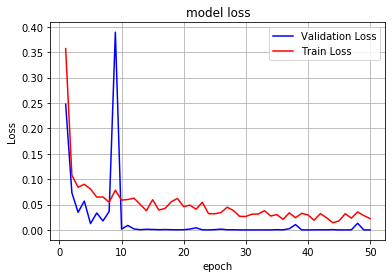

In [172]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')
# list of epoch numbers
x = list(range(1,50+1))
#fetch validation loss and train loss value from histroy data fraame
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)#call the funtion

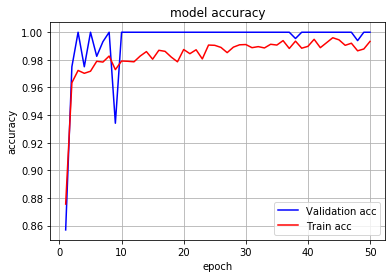

In [173]:
fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('epoch') ; ax1.set_ylabel('accuracy')
#fetch validation acc and train acc value from histroy data frame
vya = history.history['val_acc']
tya = history.history['acc']
plt_dynamic_acc(x, vya, tya, ax1)#call the funtion

In [0]:
pred_y=(classifier.predict(X_test)).round()#predicte the value on test data and round function for change into single digit no  

In [156]:
report(y_test,pred_y)#call report function

Null Accuracy: 85.6818%
Confusion Matrix
[[1131    0]
 [   0  189]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 100.0000%
Recall Score: 100.0000%
Specificity Score: 100.0000%
False Positive Rate: 0.0000%
Precision Score: 100.0000%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1131
           1       1.00      1.00      1.00       189

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [0]:
classifier.save('/content/drive/My Drive/deep learning/classifier.h5')#save the model into .h5 format